In [10]:
import numpy as np
import pandas as pd
import os
import PIL
from PIL import Image
import tensorflow as tf
import selenium
from selenium import webdriver
import time
import requests

import io
import hashlib
import shutil

import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np

# importing libraries
import tensorflow  
from skimage import io
import glob 
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [11]:
class_list = os.listdir('../data/flowers_clean')

In [11]:
# Importing and Loading the data into a data frame

dataset_path = '../data/google_images/train'
class_names = class_list

# apply glob module to retrieve files/pathnames  

plant_path = os.path.join(dataset_path, class_names[1], '*')
plant_path = glob.glob(plant_path)

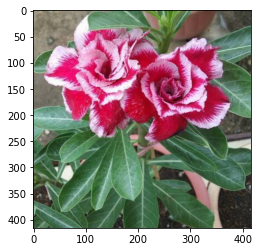

In [12]:
# accessing an image file from the dataset classes
image = io.imread(plant_path[4])  

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

Text(0.5, 0.98, 'Original & RGB image channels')

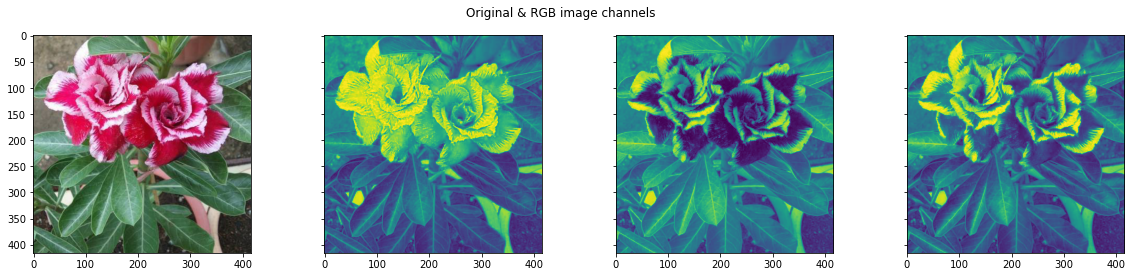

In [13]:
# plotting the original image and the RGB channels  

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

In [15]:
rootdir = '../data/flowers_clean'

In [16]:
for i in class_list:
    os.makedirs('../data/google_images' +'/train_val/' + i)

    os.makedirs('../data/google_images' +'/test/' + i)

    source = rootdir + '/' + i

    allFileNames = os.listdir(source)

    np.random.shuffle(allFileNames)

    test_ratio = 0.2

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])

    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
        shutil.copy(name, '../data/google_images' +'/train_val/' + i)

    for name in test_FileNames:
        shutil.copy(name, '../data/google_images' +'/test/' + i)

In [17]:
for i in class_list:
    os.makedirs('../data/google_images' +'/train/' + i)
    os.makedirs('../data/google_images' +'/val/' + i)
    source = '../data/google_images/train_val' + '/' + i
    allFileNames = os.listdir(source)

    np.random.shuffle(allFileNames)

    test_ratio = 0.2

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])

    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
        shutil.copy(name, '../data/google_images' +'/train/' + i)

    for name in test_FileNames:
        shutil.copy(name, '../data/google_images' +'/val/' + i)

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2, 
    brightness_range = [0.8, 1.2]
)

In [14]:
img = load_img('../data/google_images/train/allamanda_cathartica_flower/e8b14e7eed.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in train_datagen.flow(x, batch_size=1,
                          save_to_dir='../data/google_images/data aug preview/', save_prefix='allamanda_cathartica', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely